<a href="https://colab.research.google.com/github/HariKrishnanKumarakrishnan/CharacterDetectionUsingComputerVision/blob/main/Anime_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download shanmukh05/anime-names-and-image-generation

100% 1.90G/1.90G [00:17<00:00, 40.4MB/s]



In [5]:
%tensorflow_version 2.x

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
from zipfile import ZipFile
from PIL import Image
zip_path='/content/anime-names-and-image-generation.zip'
with zipfile.ZipFile(zip_path) as z:
  z.extractall(".")
  files_in_zip = z.namelist()
len(files_in_zip)

58088

In [7]:
import os.path, sys
path = "/content/dataset/dataset"
dirs = os.listdir(path)
def crop():
    for item in dirs:
        fullpath = os.path.join(path,item)
        if os.path.isfile(fullpath):
            im = Image.open(fullpath)
            f, e = os.path.splitext(fullpath)
            imCrop = im.crop((0, 0, 224, 224)) 
            rgb_im = imCrop.convert('RGB')
            rgb_im.save(f+'Cropped.jpg', quality=100)
            os.remove(fullpath)
crop()

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


dataset/dataset/Tsugumi_Hazawa.jpg


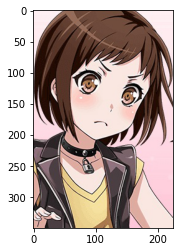

In [10]:
with ZipFile(zip_path) as myzip:
  with myzip.open(files_in_zip[52342]) as myfile:
    plt.imshow(mpimg.imread(myfile))
    print(myfile.name)


In [ ]:
#import pathlib
#import glob
#import urllib.request
#from tqdm import tqdm
#import seaborn as sns
#import warnings
#warnings.filterwarnings("ignore")

In [9]:
#import keras
#from keras.applications.resnet50 import preprocess_input, decode_predictions
#from keras.preprocessing import image
#print(tf.__version__)
#print(tf.keras.__version__)
#from google.colab import drive
#drive.mount('/content/gdrive')

Using TensorFlow backend.


1.15.2
2.2.4-tf
Mounted at /content/gdrive


In [11]:
def getCharacterName(myfile):
  fname = myfile.name
  fname.replace('dataset/dataset','')
  fname.replace('_', '')
  return fname 
#model = keras.applications.VGG16(weights='imagenet', include_top=True)



In [12]:
#!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [12]:
#model.summary()

In [13]:
def load_img(path):
  img = image.load_img(path, target_size=model.input_shape[1:3])
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  return img, x


shape:  (1, 224, 224, 3)
dtype:  float32


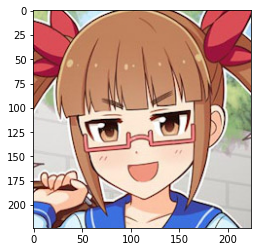

In [19]:
#img, x = load_image("/content/dataset/dataset/Akiha_IkebukuroCropped.jpg")
#print("shape: ", x.shape)
#print("dtype: ", x.dtype)
#plt.imshow(img)

In [21]:
import tensorflow_hub as hub
import glob
def get_img_feature():
  module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"
  module = hub.load(module_handle)
  for filename in glob.glob('/content/dataset/dataset*.jpg'):
    print(filename)
    img = load_img(filename)
    features = module(img)
    feature_set = np.squeeze(features)
    outfile_name = os.path.basename(filename) + ".npz"
    out_path = os.path.join("/content/dataset/dataset/featurevectors")
    np.savetxt(out_path, feature_set, delimiter=',')
get_img_feature()

